# Categorising Text as Spam or Ham
Here I will take a text file where some lines are spam and others are ham and see if I can correctly categorise the data using Support Vector Machines. The data is from the UCI
Machine Learning Repository. 
One issue with the data however is that the spam and ham text fields are not coming from one source.

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

## Loading Dataset

In [34]:
names = ["Label", "Text"]

In [35]:
text = pd.read_csv("C:/Users/keren/OneDrive/Documents/Machine learning/SMSSpamCollection", sep= '\t', names = names)

In [36]:
text.head().style

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [37]:
#descripition of text
with open("C:/Users/keren/OneDrive/Documents/Machine learning/readme", 'r',
        encoding = 'latin-1') as file:
        content = file.readlines()
        print(*content[1:43], sep = '\n')

-------------------------



1. DESCRIPTION

--------------



The SMS Spam Collection v.1 (hereafter the corpus) is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam. 



1.1. Compilation

----------------



This corpus has been collected from free or free for research sources at the Web:



- A collection of between 425 SMS spam messages extracted manually from the Grumbletext Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages. The Grumbletext Web site is: http://www.grumbletext.co.uk/

- A list of 450 SMS ham messages collected from Caroline Tag's PhD Theses available at http://e

## EDA

In [38]:
text.shape

(5572, 2)

In [39]:
#The target variable is label
text['Label'].value_counts()

ham     4825
spam     747
Name: Label, dtype: int64

In [40]:
#An example of some spam lines
text[text['Label'] == "spam"].head().style

,Label,Text
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
5,spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv"
8,spam,WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
9,spam,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030
11,spam,"SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info"


spam lines are unwanted advertistments

In [41]:
#An example of some ham lines
text[text['Label'] == "ham"].head().style

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"
6,ham,Even my brother is not like to speak with me. They treat me like aids patent.


ham lines just regular conversion

## Tokenising the text

In [42]:
from nltk.tokenize import word_tokenize
from matplotlib import pyplot as plt

In [ ]:
#Tokenising the text
text['Text_token'] = text.apply(lambda row: nltk.word_tokenize(row['Text']), axis=1)

In [ ]:
text

,Label,Text,Text_token
0,ham,"Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy, .., Avail..."
1,ham,Ok lar... Joking wif u oni...,"[Ok, lar, ..., Joking, wif, u, oni, ...]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,ham,U dun say so early hor... U c already then say...,"[U, dun, say, so, early, hor, ..., U, c, alrea..."
4,ham,"Nah I don't think he goes to usf, he lives aro...","[Nah, I, do, n't, think, he, goes, to, usf, ,,..."
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,"[This, is, the, 2nd, time, we, have, tried, 2,..."
5568,ham,Will ü b going to esplanade fr home?,"[Will, ü, b, going, to, esplanade, fr, home, ?]"
5569,ham,"Pity, * was in mood for that. So...any other s...","[Pity, ,, *, was, in, mood, for, that, ., So, ..."
5570,ham,The guy did some bitching but I acted like i'd...,"[The, guy, did, some, bitching, but, I, acted,..."


## Word Length

In [ ]:
spam_rows = text[text['Label']== 'spam']

In [ ]:
ham_rows = text[text['Label']== 'ham']

In [ ]:
spam_rows

,Label,Text,Text_token
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...,"[FreeMsg, Hey, there, darling, it, 's, been, 3..."
8,spam,WINNER!! As a valued network customer you have...,"[WINNER, !, !, As, a, valued, network, custome..."
9,spam,Had your mobile 11 months or more? U R entitle...,"[Had, your, mobile, 11, months, or, more, ?, U..."
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...","[SIX, chances, to, win, CASH, !, From, 100, to..."
...,...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...,"[Want, explicit, SEX, in, 30, secs, ?, Ring, 0..."
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,"[ASKED, 3MOBILE, IF, 0870, CHATLINES, INCLU, I..."
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...,"[Had, your, contract, mobile, 11, Mnths, ?, La..."
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,"[REMINDER, FROM, O2, :, To, get, 2.50, pounds,..."


In [ ]:
ham_rows

,Label,Text,Text_token
0,ham,"Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy, .., Avail..."
1,ham,Ok lar... Joking wif u oni...,"[Ok, lar, ..., Joking, wif, u, oni, ...]"
3,ham,U dun say so early hor... U c already then say...,"[U, dun, say, so, early, hor, ..., U, c, alrea..."
4,ham,"Nah I don't think he goes to usf, he lives aro...","[Nah, I, do, n't, think, he, goes, to, usf, ,,..."
6,ham,Even my brother is not like to speak with me. ...,"[Even, my, brother, is, not, like, to, speak, ..."
...,...,...,...
5565,ham,Huh y lei...,"[Huh, y, lei, ...]"
5568,ham,Will ü b going to esplanade fr home?,"[Will, ü, b, going, to, esplanade, fr, home, ?]"
5569,ham,"Pity, * was in mood for that. So...any other s...","[Pity, ,, *, was, in, mood, for, that, ., So, ..."
5570,ham,The guy did some bitching but I acted like i'd...,"[The, guy, did, some, bitching, but, I, acted,..."


In [ ]:
spam_words = spam_rows['Text_token']

In [ ]:
spam_words_lengths = [len(w) for w in spam_words]

In [ ]:
ham_words = ham_rows['Text_token']

In [ ]:
ham_words_lengths = [len(w) for w in ham_words]

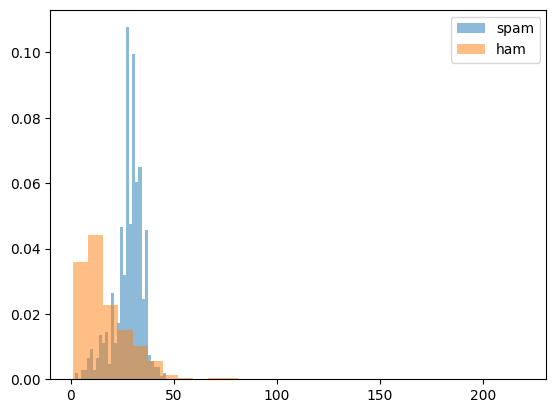

In [ ]:
#Relative frequency histogram
bins = 30
plt.hist(spam_words_lengths, bins = bins, alpha = 0.5, label = 'spam', density=True)
plt.hist(ham_words_lengths, bins = bins, alpha = 0.5, label =  'ham', density=True)
plt.legend(loc='upper right')
plt.show()

The ham texts contain less characters than the spam texts.

## Word Cloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
#Joining all spam words into one string
spam_text = " ".join(word for word in spam_rows.Text)

In [ ]:
spam_text

'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'s FreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only. Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030 SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18 XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message o

In [ ]:
ham_text = " ".join(word for word in ham_rows.Text)

In [ ]:
spam_wordcloud = WordCloud().generate(spam_text)

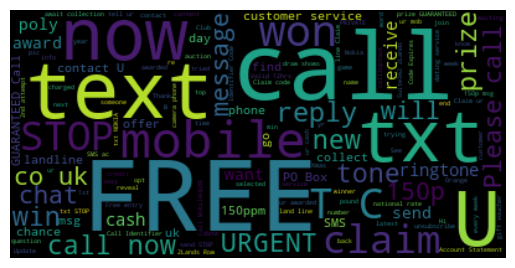

In [ ]:
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

So once again we can see that the words from the spam text are adverts. As you can see words like 'FREE', 'prize', 'claim' are amongst the most common 

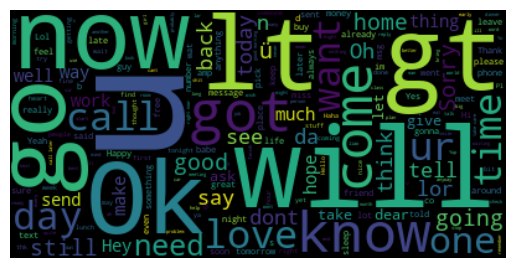

In [ ]:
ham_wordcloud = WordCloud().generate(ham_text)

plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The words from the ham text are again clearly messages. Words like 'love', 'know', 'will', 'need' are amongs the most common

## Creating Bag of Words Vector

In [ ]:
pip install gensim


     ---------------------------------------- 24.0/24.0 MB 2.1 MB/s eta 0:00:00
     -------------------------------------- 57.0/57.0 kB 995.9 kB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from collections import Counter

In [ ]:
#creating tokens of the spam text
spam_text_tokenised = word_tokenize(spam_text)

In [ ]:
spam_text_tokenised

['Free',
 'entry',
 'in',
 '2',
 'a',
 'wkly',
 'comp',
 'to',
 'win',
 'FA',
 'Cup',
 'final',
 'tkts',
 '21st',
 'May',
 '2005',
 '.',
 'Text',
 'FA',
 'to',
 '87121',
 'to',
 'receive',
 'entry',
 'question',
 '(',
 'std',
 'txt',
 'rate',
 ')',
 'T',
 '&',
 'C',
 "'s",
 'apply',
 '08452810075over18',
 "'s",
 'FreeMsg',
 'Hey',
 'there',
 'darling',
 'it',
 "'s",
 'been',
 '3',
 'week',
 "'s",
 'now',
 'and',
 'no',
 'word',
 'back',
 '!',
 'I',
 "'d",
 'like',
 'some',
 'fun',
 'you',
 'up',
 'for',
 'it',
 'still',
 '?',
 'Tb',
 'ok',
 '!',
 'XxX',
 'std',
 'chgs',
 'to',
 'send',
 ',',
 '£1.50',
 'to',
 'rcv',
 'WINNER',
 '!',
 '!',
 'As',
 'a',
 'valued',
 'network',
 'customer',
 'you',
 'have',
 'been',
 'selected',
 'to',
 'receivea',
 '£900',
 'prize',
 'reward',
 '!',
 'To',
 'claim',
 'call',
 '09061701461',
 '.',
 'Claim',
 'code',
 'KL341',
 '.',
 'Valid',
 '12',
 'hours',
 'only',
 '.',
 'Had',
 'your',
 'mobile',
 '11',
 'months',
 'or',
 'more',
 '?',
 'U',
 'R',
 'en

In [ ]:
#most common tokens in spam text
Counter(spam_text_tokenised)

Counter({'.': 1016,
         'to': 611,
         '!': 545,
         ',': 378,
         'a': 360,
         'you': 189,
         'call': 187,
         'your': 187,
         'or': 185,
         '&': 178,
         'the': 178,
         '2': 176,
         '?': 175,
         'for': 170,
         ':': 163,
         'is': 149,
         'on': 139,
         'now': 138,
         'Call': 138,
         'have': 129,
         '4': 122,
         'and': 119,
         'from': 116,
         'FREE': 115,
         '*': 115,
         'ur': 107,
         'with': 102,
         'mobile': 95,
         'of': 93,
         'U': 90,
         'You': 82,
         'claim': 78,
         'are': 77,
         'our': 76,
         'Txt': 75,
         'To': 74,
         'prize': 73,
         'text': 73,
         'txt': 71,
         'Your': 71,
         'in': 68,
         "'s": 68,
         ')': 66,
         'T': 66,
         'STOP': 63,
         'free': 62,
         'only': 58,
         'reply': 58,
         '-': 56,
        

In [ ]:
#creating tokens of ham text
ham_text_tokenised = word_tokenize(ham_text)

In [ ]:
#most common tokens in ham text
Counter(ham_text_tokenised)

Counter({'.': 3885,
         'I': 1933,
         'you': 1704,
         ',': 1560,
         'to': 1548,
         '?': 1375,
         '...': 1139,
         'the': 1033,
         'a': 979,
         'i': 947,
         '!': 852,
         ';': 766,
         'in': 764,
         'and': 747,
         '&': 744,
         'u': 733,
         'me': 723,
         '..': 685,
         'is': 673,
         'my': 625,
         'it': 587,
         ':': 559,
         'of': 505,
         'for': 486,
         'that': 478,
         ')': 433,
         "'s": 423,
         "'m": 387,
         'do': 381,
         'your': 375,
         'have': 369,
         'on': 365,
         'not': 358,
         "n't": 348,
         'at': 339,
         'are': 328,
         'gt': 318,
         'be': 317,
         'lt': 316,
         '2': 313,
         'can': 302,
         'so': 297,
         'will': 297,
         'but': 291,
         'get': 290,
         '#': 281,
         'U': 272,
         'up': 264,
         'now': 261,
       

## Predicting if Text is Spam or Ham?

### Creating TfIdf Matrix

In [24]:
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer

In [59]:
text['spam'] = text['Label'].apply(lambda row: 1 if row == 'spam' else 0)

In [61]:
text[['Label', 'spam']]

,Label,spam
0,ham,0
1,ham,0
2,spam,1
3,ham,0
4,ham,0
...,...,...
5567,spam,1
5568,ham,0
5569,ham,0
5570,ham,0


In [25]:
X = text['Text']

In [62]:
y = text['spam']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 12)

In [64]:
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english')

In [65]:
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

In [66]:
tfidf_test = tfidf_vectorizer.transform(X_test)

### SVM

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [67]:
SVM = SVC()

In [46]:
SVM

SVC()

In [68]:
SVM.fit(tfidf_train, y_train)

SVC()

In [69]:
#Training data prediction
train_predict = SVM.predict(tfidf_train)

In [70]:
#Testing data prediction
test_predict = SVM.predict(tfidf_test)

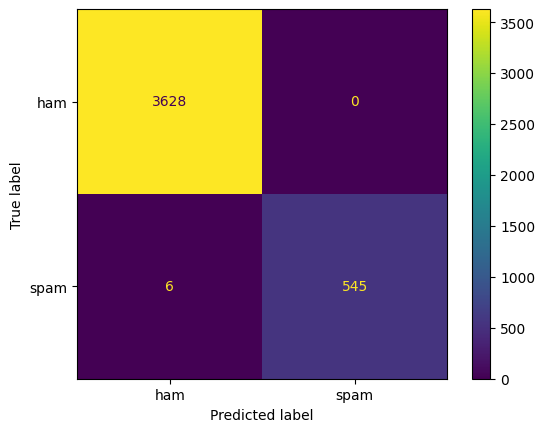

In [73]:
#Training data confusion matrix
cm_train = confusion_matrix(y_train, train_predict)
display = ConfusionMatrixDisplay(cm_train, display_labels=["ham", "spam"])
display.plot()
plt.show()


Incredibly the model has almost near perfect accuracy. The model is entirely accurate for predicting ham labels as ham and only incorrectly classifies 6 spam labels as ham.

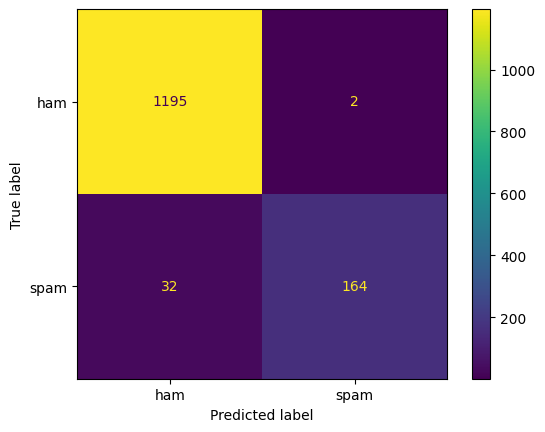

In [74]:
#Testing data confusion matrix
cm_test = confusion_matrix(y_test, test_predict)
display = ConfusionMatrixDisplay(cm_test, display_labels=["ham", "spam"])
display.plot()
plt.show()

Expectedly accuracy splits somewhat for the testing data. However, almost all ham labels were correctly labeled as ham and around a quarter or spam labels were incorrectly 
classed as ham. The somewhat lower accuracy for spam may be caused by the fact that an overwhelming majority of the data in the sample was ham. Prehaps with more spam entries 
accuracy would have been higher for spam. All of that being said, I think this model has been quite succesful. 